# Project Title: **Exploratory Data Analysis of BMI and Weight-Related Health Trends in the U.S. Population**

---

## Introduction

This project explores trends in body mass index (BMI) categories—such as normal weight, overweight, and obesity—among adults in the United States, based on demographic and temporal factors. Using data from the National Health and Nutrition Examination Survey, we aim to uncover patterns in obesity prevalence across different age groups, survey years, and demographic segments like sex and race. The findings provide insight into how weight-related health issues have evolved over the years and highlight specific areas where public health interventions may be most impactful.

In examining distribution, trends, and demographic variations in BMI, we aim to enhance understanding of population health dynamics in the U.S., supporting data-driven approaches to mitigate obesity and related health risks.

---

## Data Dictionary

| Column Name                  | Description                                                                                   |
|------------------------------|-----------------------------------------------------------------------------------------------|
| **Health_Status**            | General category indicating weight status, including normal weight, overweight, and obesity.  |
| **BMI_Category**             | Specific BMI range classification (e.g., Normal, Grade 1 Obesity) based on standard BMI values. |
| **Population_Percentage_Type** | Type of population metric, either age-adjusted or crude percentage.                          |
| **Demographic_Category**     | Category used to segment the data, such as by sex, race, or age.                              |
| **Age_Range**                | Specific age group associated with the data, ranging from "20 years and over" to "75 years and over". |
| **Survey_Period**            | Time period during which the survey was conducted, presented as a range of years (e.g., 2005-2008). |
| **AGE**                      | Age category (e.g., 20-34 years) of the individuals in the dataset.                           |
| **ESTIMATE**                 | Estimated percentage of the population within a given BMI category.                           |
| **SE**                       | Standard error of the estimate, indicating the data's precision.                              |
| **FLAG**                     | Data quality flag, indicating specific considerations for data reliability.                   |
| **Age_Group**                | High-level age groupings (e.g., Young Adults, Senior Adults) derived for broader analysis.    |
| **Survey_Midpoint**          | Midpoint of each survey period for use in time-series analysis.                               |
| **BMI_Category_Code**        | Encoded numerical values for BMI categories, used for sorted plotting.                        |

---

The source of the data is from the National Health and Nutrition Examination Survey (NHANES), specifically focused on BMI and weight-related health trends among adults in the United States. The dataset can be accessed through the following link:

https://catalog.data.gov/dataset/normal-weight-overweight-and-obesity-among-adults-aged-20-and-over-by-selected-characteris-8e2b1



##1: Set up the Environment

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

## 2: Load the Dataset from Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Normal_weight__overweight__and_obesity_among_adults_aged_20_and_over__by_selected_characteristics__United_States.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3: Initial Exploration

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

# Check data types, missing values, and overall structure
print("\nDataset Info:")
df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Check unique values
categorical_columns = ['INDICATOR', 'PANEL', 'UNIT', 'STUB_NAME', 'YEAR', 'AGE']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

First few rows of the dataset:


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,1999-2002,2,20 years and over,1.0,33.0,0.8,NaN
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2001-2004,3,20 years and over,1.0,32.3,0.7,NaN
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2003-2006,4,20 years and over,1.0,31.6,0.8,NaN
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.1,2005-2008,5,20 years and over,1.0,30.8,0.7,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       3360 non-null   object 
 1   PANEL           3360 non-null   object 
 2   PANEL_NUM       3360 non-null   int64  
 3   UNIT            3360 non-null   object 
 4   UNIT_NUM        3360 non-null   int64  
 5   STUB_NAME       3360 non-null   object 
 6   STUB_NAME_NUM   3360 non-null   int64  
 7   STUB_LABEL      3360 non-null   object 
 8   STUB_LABEL_NUM  3360 non-null   float64
 9   YEAR            3360 non-null   object 
 10  YEAR_NUM        3360 non-null   int64  
 11  AGE             3360 non-null   object 
 12  AGE_NUM         3360 non-null   float64
 13  ESTIMATE        2899 non-null   float64
 14  SE              2899 non-null   float64
 15  FLAG            844 non-null    object 
dtypes: float64(4), int64(4), object(8)
memory usage: 420.1+ KB

Des

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR_NUM,AGE_NUM,ESTIMATE,SE
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.00000,2899.000000,2899.000000
mean,3.500000,1.607143,4.142857,3.966964,5.500000,1.07500,28.503208,1.258779
std,1.708079,0.488458,1.328846,1.470850,2.872709,0.16396,22.046444,0.569608
min,1.000000,1.000000,1.000000,1.100000,1.000000,1.00000,0.300000,0.200000
25%,2.000000,1.000000,3.000000,3.120750,3.000000,1.00000,10.000000,0.800000
50%,3.500000,2.000000,4.000000,3.241500,5.500000,1.00000,22.700000,1.200000
75%,5.000000,2.000000,5.000000,5.325000,8.000000,1.00000,38.050000,1.600000
max,6.000000,2.000000,6.000000,6.260000,10.000000,1.60000,85.900000,3.500000



Unique values in 'INDICATOR':
['Normal weight, overweight, and obesity among adults aged 20 and over']

Unique values in 'PANEL':
['Normal weight (BMI from 18.5 to 24.9)'
 'Obesity (BMI greater than or equal to 30.0)'
 'Overweight or obese (BMI greater than or equal to 25.0)'
 'Grade 1 obesity (BMI from 30.0 to 34.9)'
 'Grade 2 obesity (BMI from 35.0 to 39.9)'
 'Grade 3 obesity (BMI greater than or equal to 40.0)']

Unique values in 'UNIT':
['Percent of population, age-adjusted' 'Percent of population, crude']

Unique values in 'STUB_NAME':
['Total' 'Sex' 'Race and Hispanic origin'
 'Sex and race and Hispanic origin' 'Percent of poverty level'
 'Sex and age']

Unique values in 'YEAR':
['1988-1994' '1999-2002' '2001-2004' '2003-2006' '2005-2008' '2007-2010'
 '2009-2012' '2011-2014' '2013-2016' '2015-2018']

Unique values in 'AGE':
['20 years and over' '20-34 years' '35-44 years' '45-54 years'
 '55-64 years' '65-74 years' '75 years and over']


In [ ]:
print(df.isnull().sum())

INDICATOR       0
PANEL           0
PANEL_NUM       0
UNIT            0
UNIT_NUM        0
             ... 
AGE             0
AGE_NUM         0
ESTIMATE      461
SE            461
FLAG         2516
Length: 16, dtype: int64


## 4: Data Cleaning

In [ ]:
# Handle Missing Values


df['SE'] = df['SE'].fillna(df['SE'].median())
df['FLAG'] = df['FLAG'].fillna('No Flag')


# Convert categorical columns to 'category' dtype for optimization
categorical_columns = ['INDICATOR', 'PANEL', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE', 'FLAG']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Drop Irrelevant or redundant Columns
df.drop(columns=['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM'], inplace=True)


# Rename columns
df.rename(columns={
    'INDICATOR': 'Health_Status',
    'PANEL': 'BMI_Category',
    'UNIT': 'Population_Percentage_Type',
    'STUB_NAME': 'Demographic_Category',
    'STUB_LABEL': 'Age_Range',
    'YEAR': 'Survey_Period'
}, inplace=True)


#  cleaned dataset info
print("\nCleaned Dataset Info:")
df.info()

# first few rows of the cleaned dataset to verify changes
print("\nFirst few rows after cleaning:")
display(df.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Health_Status               3360 non-null   category
 1   BMI_Category                3360 non-null   category
 2   Population_Percentage_Type  3360 non-null   category
 3   Demographic_Category        3360 non-null   category
 4   Age_Range                   3360 non-null   category
 5   Survey_Period               3360 non-null   category
 6   AGE                         3360 non-null   category
 7   ESTIMATE                    2899 non-null   float64 
 8   SE                          3360 non-null   float64 
 9   FLAG                        3360 non-null   category
dtypes: category(8), float64(2)
memory usage: 81.8 KB

First few rows after cleaning:


,Health_Status,BMI_Category,Population_Percentage_Type,Demographic_Category,Age_Range,Survey_Period,AGE,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),"Percent of population, age-adjusted",Total,20 years and over,1988-1994,20 years and over,41.6,0.8,No Flag
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),"Percent of population, age-adjusted",Total,20 years and over,1999-2002,20 years and over,33.0,0.8,No Flag
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),"Percent of population, age-adjusted",Total,20 years and over,2001-2004,20 years and over,32.3,0.7,No Flag
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),"Percent of population, age-adjusted",Total,20 years and over,2003-2006,20 years and over,31.6,0.8,No Flag
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),"Percent of population, age-adjusted",Total,20 years and over,2005-2008,20 years and over,30.8,0.7,No Flag


## 5: Data Transformation and Feature Engineering

In [ ]:
# Create Age Category Groups (if not already categorized)
df['Age_Group'] = df['Age_Range'].apply(lambda x:
                                        'Young Adults' if '20-34' in x else
                                        'Middle-aged Adults' if '35-54' in x else
                                        'Older Adults' if '55-74' in x else
                                        'Senior Adults')

# Create a Year Midpoint for 'Survey_Period' to enable time-series plotting
df['Survey_Midpoint'] = df['Survey_Period'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)

# Encode BMI Categories for Sorting in Plots
bmi_order = {
    'Normal weight (BMI from 18.5 to 24.9)': 1,
    'Overweight or obese (BMI greater than or equal to 25.0)': 2,
    'Obesity (BMI greater than or equal to 30.0)': 3,
    'Grade 1 obesity (BMI from 30.0 to 34.9)': 4,
    'Grade 2 obesity (BMI from 35.0 to 39.9)': 5,
    'Grade 3 obesity (BMI greater than or equal to 40.0)': 6
}
df['BMI_Category_Code'] = df['BMI_Category'].map(bmi_order)


## 6: Exploratory Data Analysis (EDA)

<Figure size 1000x600 with 0 Axes>

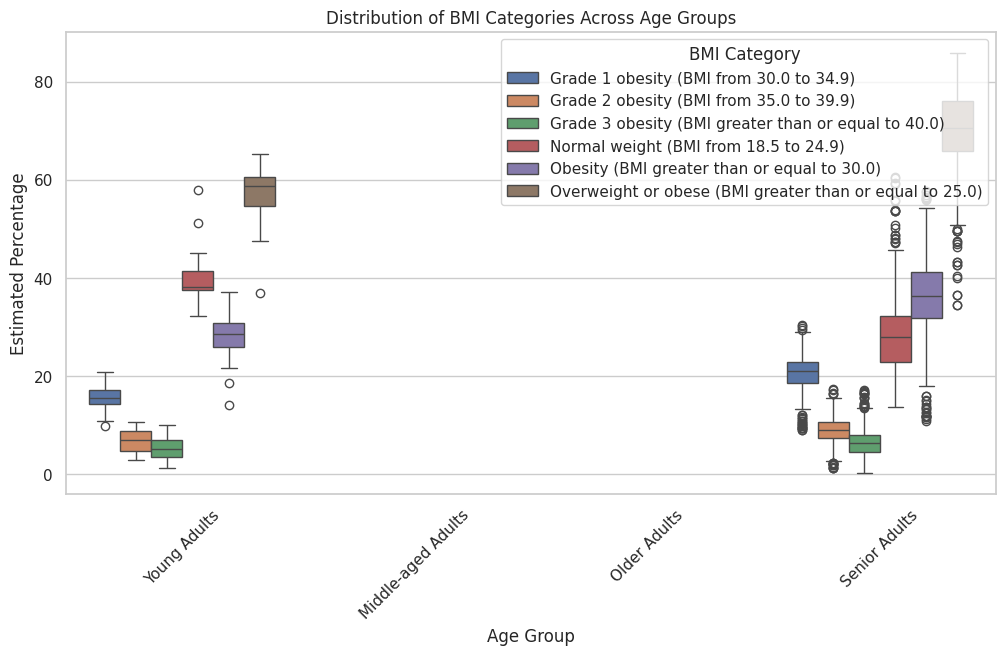

<ipython-input-7-2a6e3bf8ca71>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Survey_Midpoint', y='ESTIMATE', hue='BMI_Category', style='BMI_Category', markers=True, ci=None)


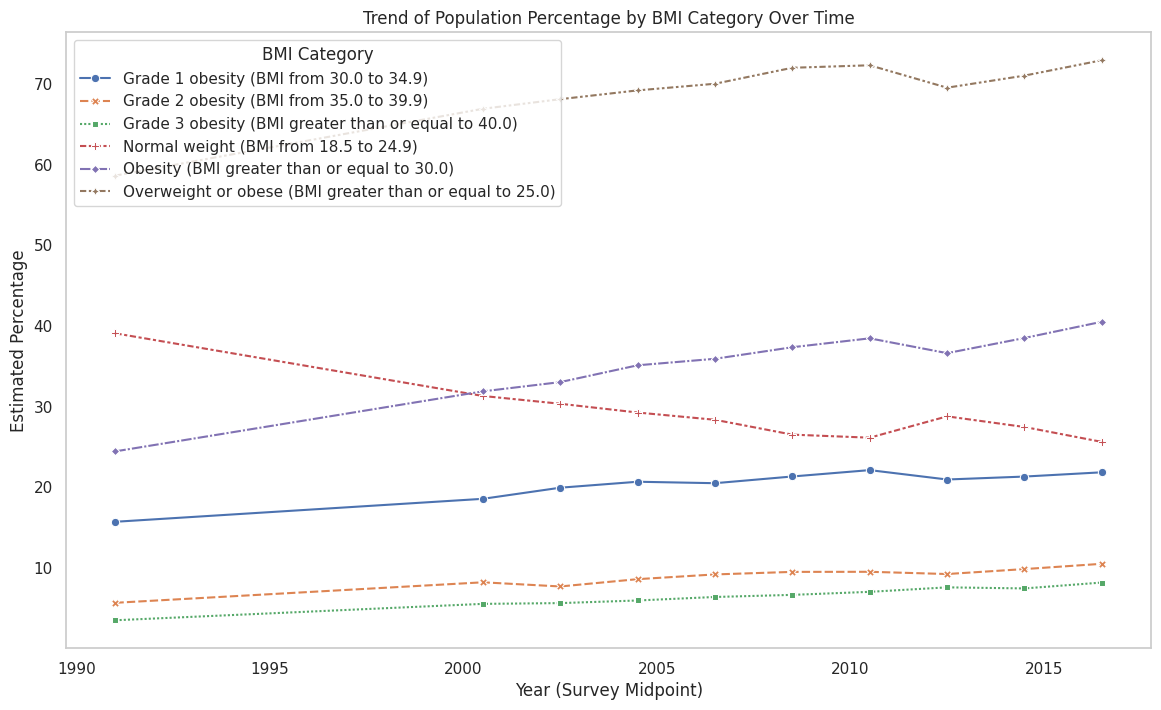

<ipython-input-7-2a6e3bf8ca71>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=demographic_focus, x='Demographic_Category', y='ESTIMATE', hue='BMI_Category', ci=None)


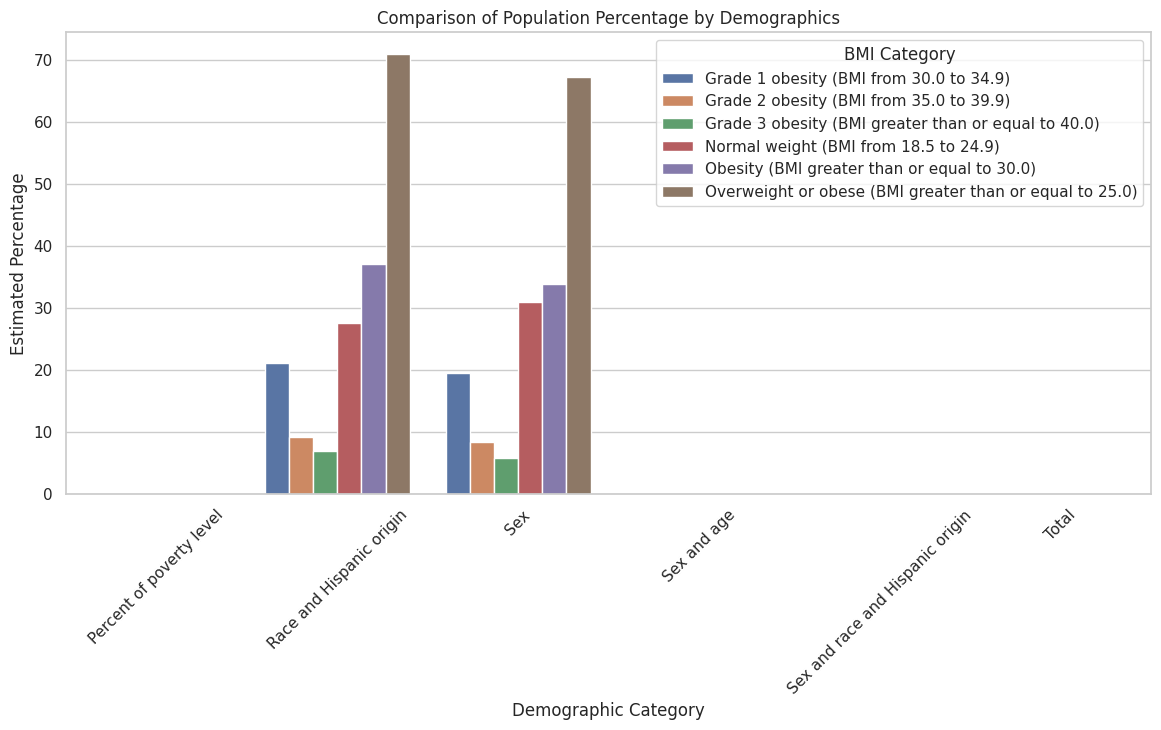

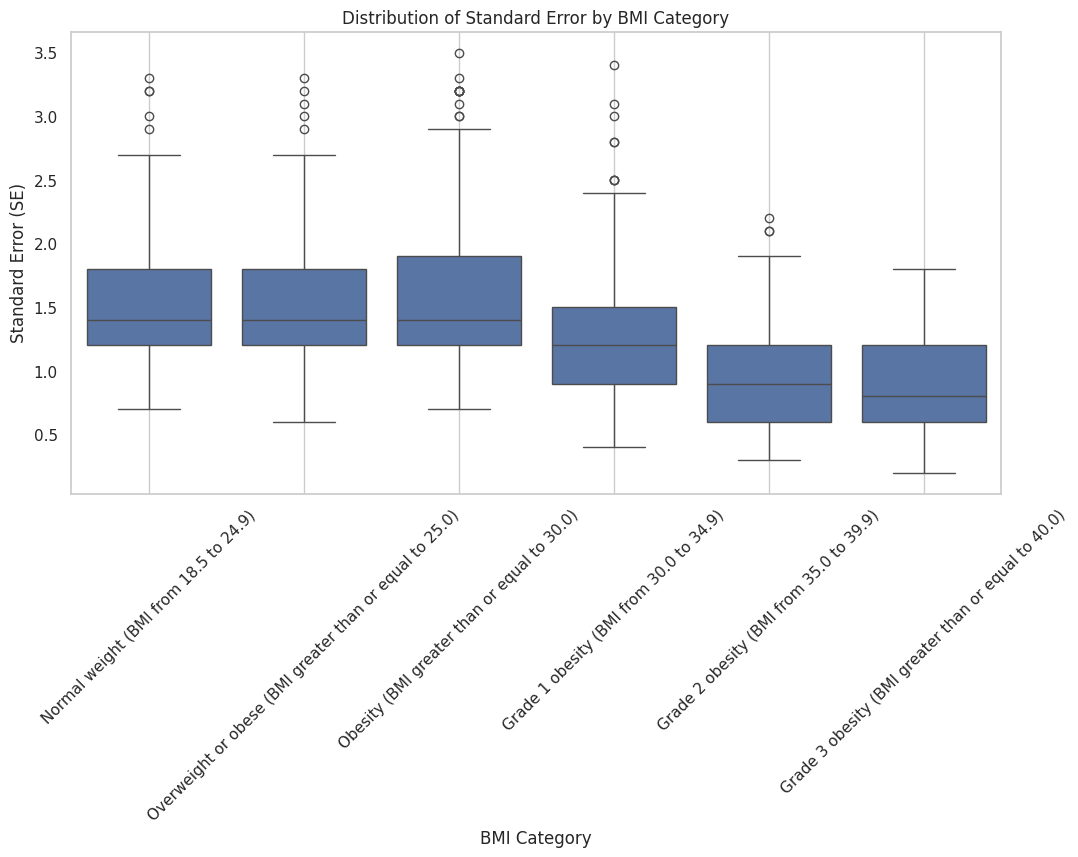

<ipython-input-7-2a6e3bf8ca71>:45: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(values='ESTIMATE', index='Survey_Period', columns='Age_Group', aggfunc='mean')


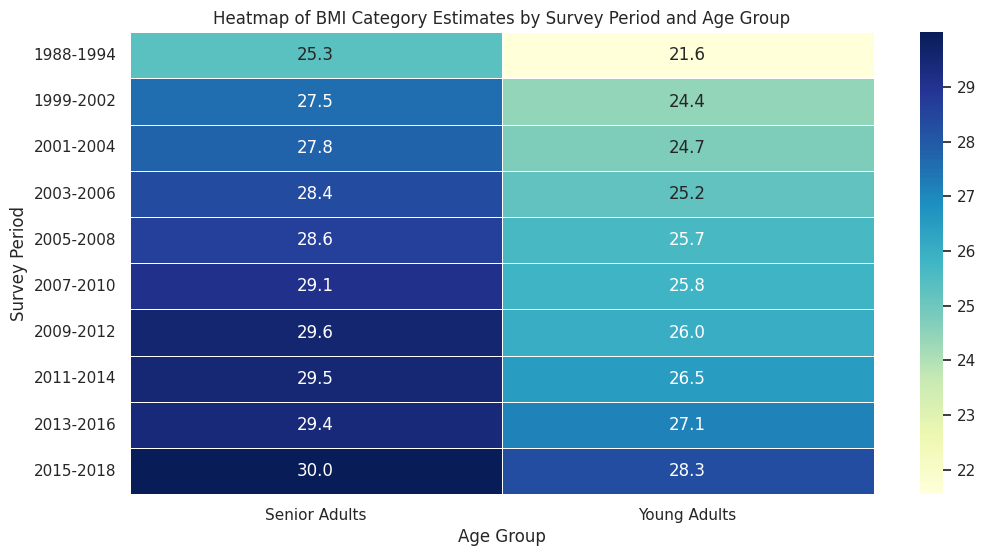

In [ ]:
plt.figure(figsize=(10, 6))

# 1. Distribution of BMI Categories Across Age Groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='ESTIMATE', hue='BMI_Category', order=['Young Adults', 'Middle-aged Adults', 'Older Adults', 'Senior Adults'])
plt.title("Distribution of BMI Categories Across Age Groups")
plt.ylabel("Estimated Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', title='BMI Category')
plt.xticks(rotation=45)
plt.show()

# 2. Trend of Population Percentage by BMI Category Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Survey_Midpoint', y='ESTIMATE', hue='BMI_Category', style='BMI_Category', markers=True, ci=None)
plt.title("Trend of Population Percentage by BMI Category Over Time")
plt.ylabel("Estimated Percentage")
plt.xlabel("Year (Survey Midpoint)")
plt.legend(loc='upper left', title='BMI Category')
plt.grid()
plt.show()

# 3. Comparison of Population Percentage by Demographics (Sex, Race)
demographic_focus = df[df['Demographic_Category'].isin(['Sex', 'Race and Hispanic origin'])]
plt.figure(figsize=(14, 6))
sns.barplot(data=demographic_focus, x='Demographic_Category', y='ESTIMATE', hue='BMI_Category', ci=None)
plt.title("Comparison of Population Percentage by Demographics")
plt.ylabel("Estimated Percentage")
plt.xlabel("Demographic Category")
plt.legend(loc='upper right', title='BMI Category')
plt.xticks(rotation=45)
plt.show()

# 4. Distribution of Standard Error (SE) by BMI Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='BMI_Category', y='SE', order=[key for key in bmi_order.keys()])
plt.title("Distribution of Standard Error by BMI Category")
plt.ylabel("Standard Error (SE)")
plt.xlabel("BMI Category")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 5. Heatmap of BMI Category Estimates by Survey Period and Age Group
heatmap_data = df.pivot_table(values='ESTIMATE', index='Survey_Period', columns='Age_Group', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=0.5)
plt.title("Heatmap of BMI Category Estimates by Survey Period and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survey Period")
plt.show()

## 7: Insights, Interpretations and Observations

**1. Distribution of BMI Categories Across Age Groups**

- **Observation**: The prevalence of higher BMI categories increases with age.
- **Interpretation**: Older adults tend to have higher obesity rates, with Senior Adults showing the highest estimates in overweight and obesity categories.

---

**2. Trend of Population Percentage by BMI Category Over Time**

- **Observation**: There's an upward trend in obesity rates over the survey periods.
- **Interpretation**: Obesity has become more prevalent over time, while the percentage of individuals with normal weight has decreased.

---

**3. Comparison of Population Percentage by Demographics (Sex, Race)**

- **Observation**: Obesity rates vary across different sexes and racial groups.
- **Interpretation**: Certain demographic groups exhibit higher obesity estimates, indicating the impact of demographic factors on BMI categories.

---

**4. Distribution of Standard Error by BMI Category**

- **Observation**: Standard Error (SE) is relatively consistent across BMI categories but slightly higher in extreme BMI groups.
- **Interpretation**: Data estimates are generally reliable, though estimates for extreme BMI categories may be less precise.

---

**5. Heatmap of BMI Category Estimates by Survey Period and Age Group**

- **Observation**: Higher BMI estimates increase over time across all age groups, especially among Middle-aged and Older Adults.
- **Interpretation**: There's a noticeable rise in obesity rates over recent years, indicating a growing public health concern across age demographics.

---

